# Machine Learning CA1

## Importing Required Libraries

In [690]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn 
import tensorflow as tf

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

## Data Importing and Preprocessing

In [691]:
# Read the dataset
df = pd.read_csv('kc_house_data.csv')
df.head(20)

id             date      price  bedrooms  bathrooms  sqft_living  \
0   7129300520  20141013T000000   221900.0         3       1.00         1180   
1   6414100192  20141209T000000   538000.0         3       2.25         2570   
2   5631500400  20150225T000000   180000.0         2       1.00          770   
3   2487200875  20141209T000000   604000.0         4       3.00         1960   
4   1954400510  20150218T000000   510000.0         3       2.00         1680   
5   7237550310  20140512T000000  1225000.0         4       4.50         5420   
6   1321400060  20140627T000000   257500.0         3       2.25         1715   
7   2008000270  20150115T000000   291850.0         3       1.50         1060   
8   2414600126  20150415T000000   229500.0         3       1.00         1780   
9   3793500160  20150312T000000   323000.0         3       2.50         1890   
10  1736800520  20150403T000000   662500.0         3       2.50         3560   
11  9212900260  20140527T000000   468000.0         2       1.00         1160   
12   114101516  20140528T000000   310000.0         3       1.00         1430   
13  6054650070  20141007T000000   400000.0         3       1.75         1370   
14  1175000570  20150312T000000   530000.0         5       2.00         1810   
15  9297300055  20150124T000000   650000.0         4       3.00         2950   
16  1875500060  20140731T000000   395000.0         3       2.00         1890   
17  6865200140  20140529T000000   485000.0         4       1.00         1600   
18    16000397  20141205T000000   189000.0         2       1.00         1200   
19  7983200060  20150424T000000   230000.0         3       1.00         1250   

    sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0       5650     1.0           0     0  ...      7        1180              0   
1       7242     2.0           0     0  ...      7        2170            400   
2      10000     1.0           0     0  ...      6         770              0   
3       5000     1.0           0     0  ...      7        1050            910   
4       8080     1.0           0     0  ...      8        1680              0   
5     101930     1.0           0     0  ...     11        3890           1530   
6       6819     2.0           0     0  ...      7        1715              0   
7       9711     1.0           0     0  ...      7        1060              0   
8       7470     1.0           0     0  ...      7        1050            730   
9       6560     2.0           0     0  ...      7        1890              0   
10      9796     1.0           0     0  ...      8        1860           1700   
11      6000     1.0           0     0  ...      7         860            300   
12     19901     1.5           0     0  ...      7        1430              0   
13      9680     1.0           0     0  ...      7        1370              0   
14      4850     1.5           0     0  ...      7        1810              0   
15      5000     2.0           0     3  ...      9        1980            970   
16     14040     2.0           0     0  ...      7        1890              0   
17      4300     1.5           0     0  ...      7        1600              0   
18      9850     1.0           0     0  ...      7        1200              0   
19      9774     1.0           0     0  ...      7        1250              0   

    yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0       1955             0    98178  47.5112 -122.257           1340   
1       1951          1991    98125  47.7210 -122.319           1690   
2       1933             0    98028  47.7379 -122.233           2720   
3       1965             0    98136  47.5208 -122.393           1360   
4       1987             0    98074  47.6168 -122.045           1800   
5       2001             0    98053  47.6561 -122.005           4760   
6       1995             0    98003  47.3097 -122.327           2238   
7       1963             0    98198  47.4095 -122.315

In [692]:
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [693]:
# Checking for categorical data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [694]:
yr_reonvated_count = df['yr_renovated'].value_counts()[0]
yr_reonvated_count

20699

In [695]:
# Removing unnecassary features from the dataset which are not relavent
df = df.drop(['id', 'date', 'yr_renovated'], axis = 1)

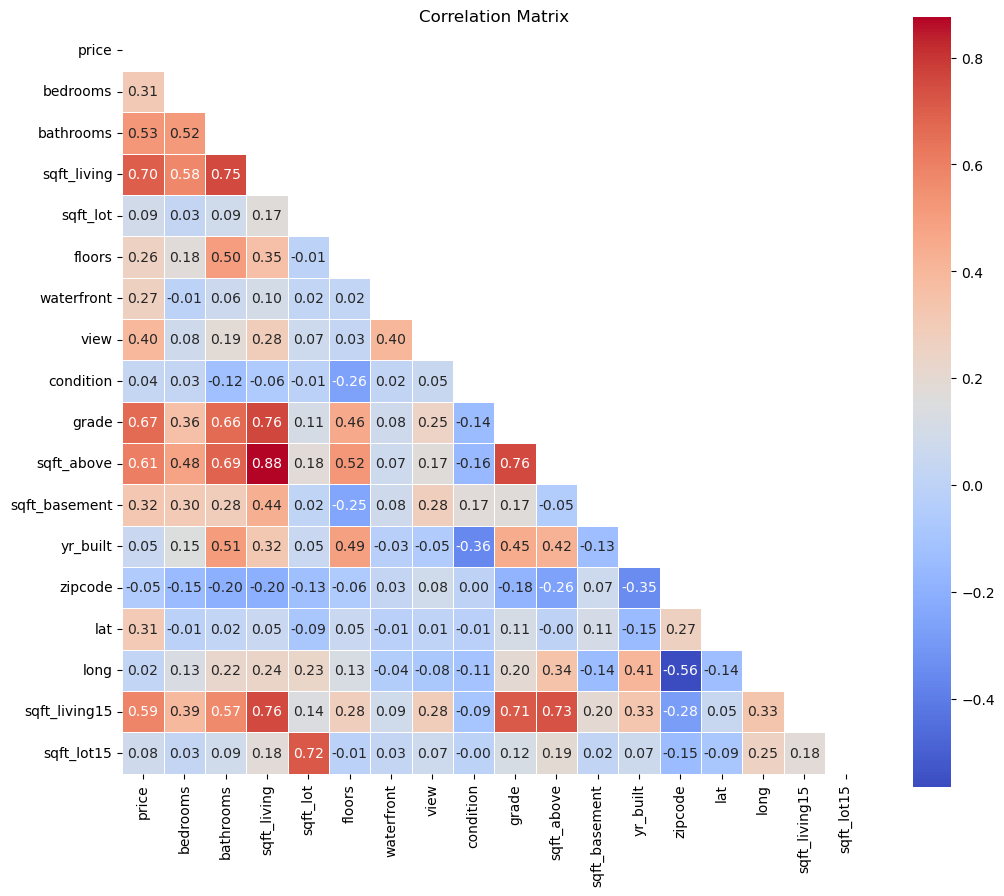

In [698]:
# Compute the correlation matrix
correlation_matrix = df.corr()
# Create a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidth=.5)
plt.title('Correlation Matrix')
plt.show()

In [699]:
# df = df.drop(['view', 'zipcode', 'lat', 'long', 'sqft_basement'], axis = 1)

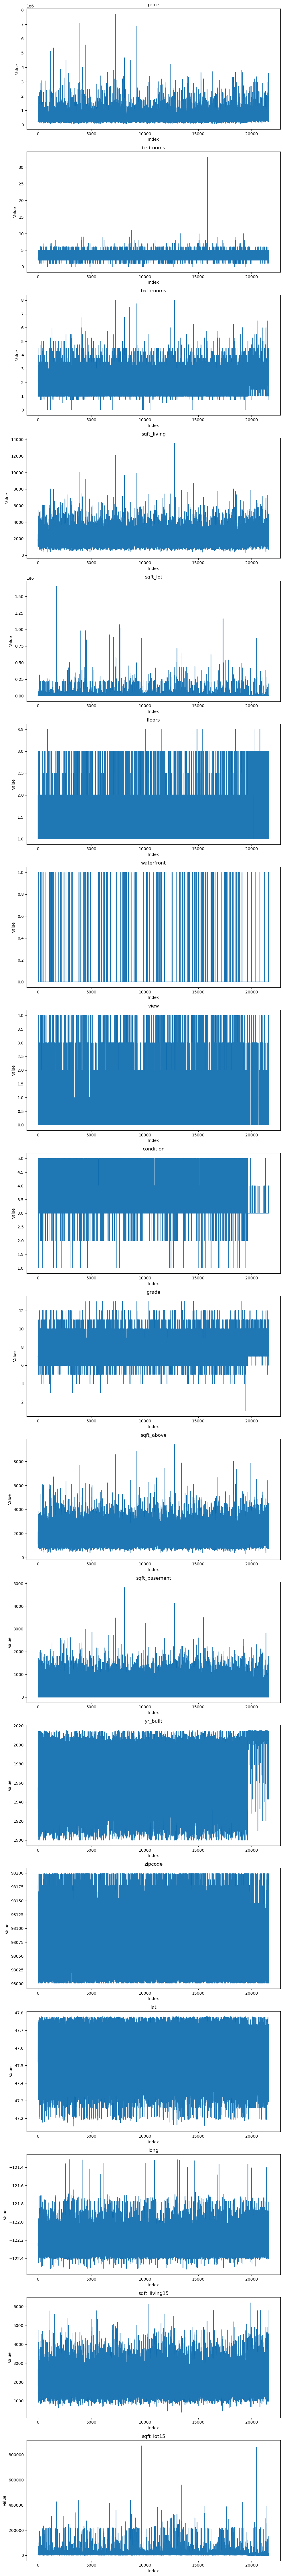

In [760]:
# Get the column names
columns = df.columns

# Set the number of rows and columns for subplots
num_rows = len(columns)
num_cols = 1  # Each column will have its own subplot

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5*num_rows))

# Plot each column on a separate graph
for i, column in enumerate(columns):
    ax = axes[i] if num_rows > 1 else axes  # Get the axis for the current subplot
    ax.plot(df.index, df[column])
    ax.set_title(column)
    ax.set_xlabel('Index')
    ax.set_ylabel('Value')

# Adjust layout
plt.tight_layout()

C:\Users\marty\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\marty\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


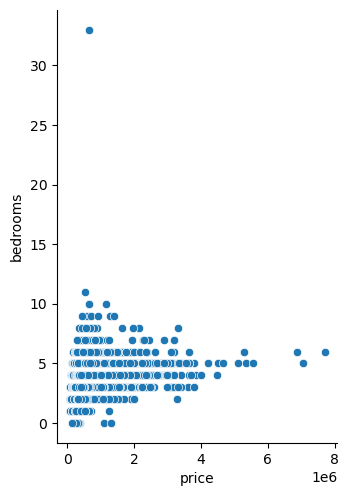

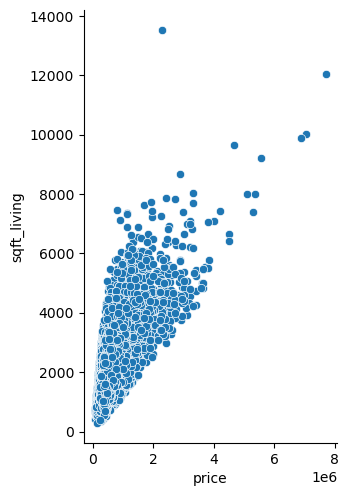

In [700]:
# Visualise the relationship between the features and the response using scatterplots
sns.pairplot(df, x_vars=['price'], y_vars='bedrooms',size = 5, aspect = 0.7, kind = 'scatter')
sns.pairplot(df, x_vars=['price'], y_vars='sqft_living',size = 5, aspect = 0.7, kind = 'scatter')

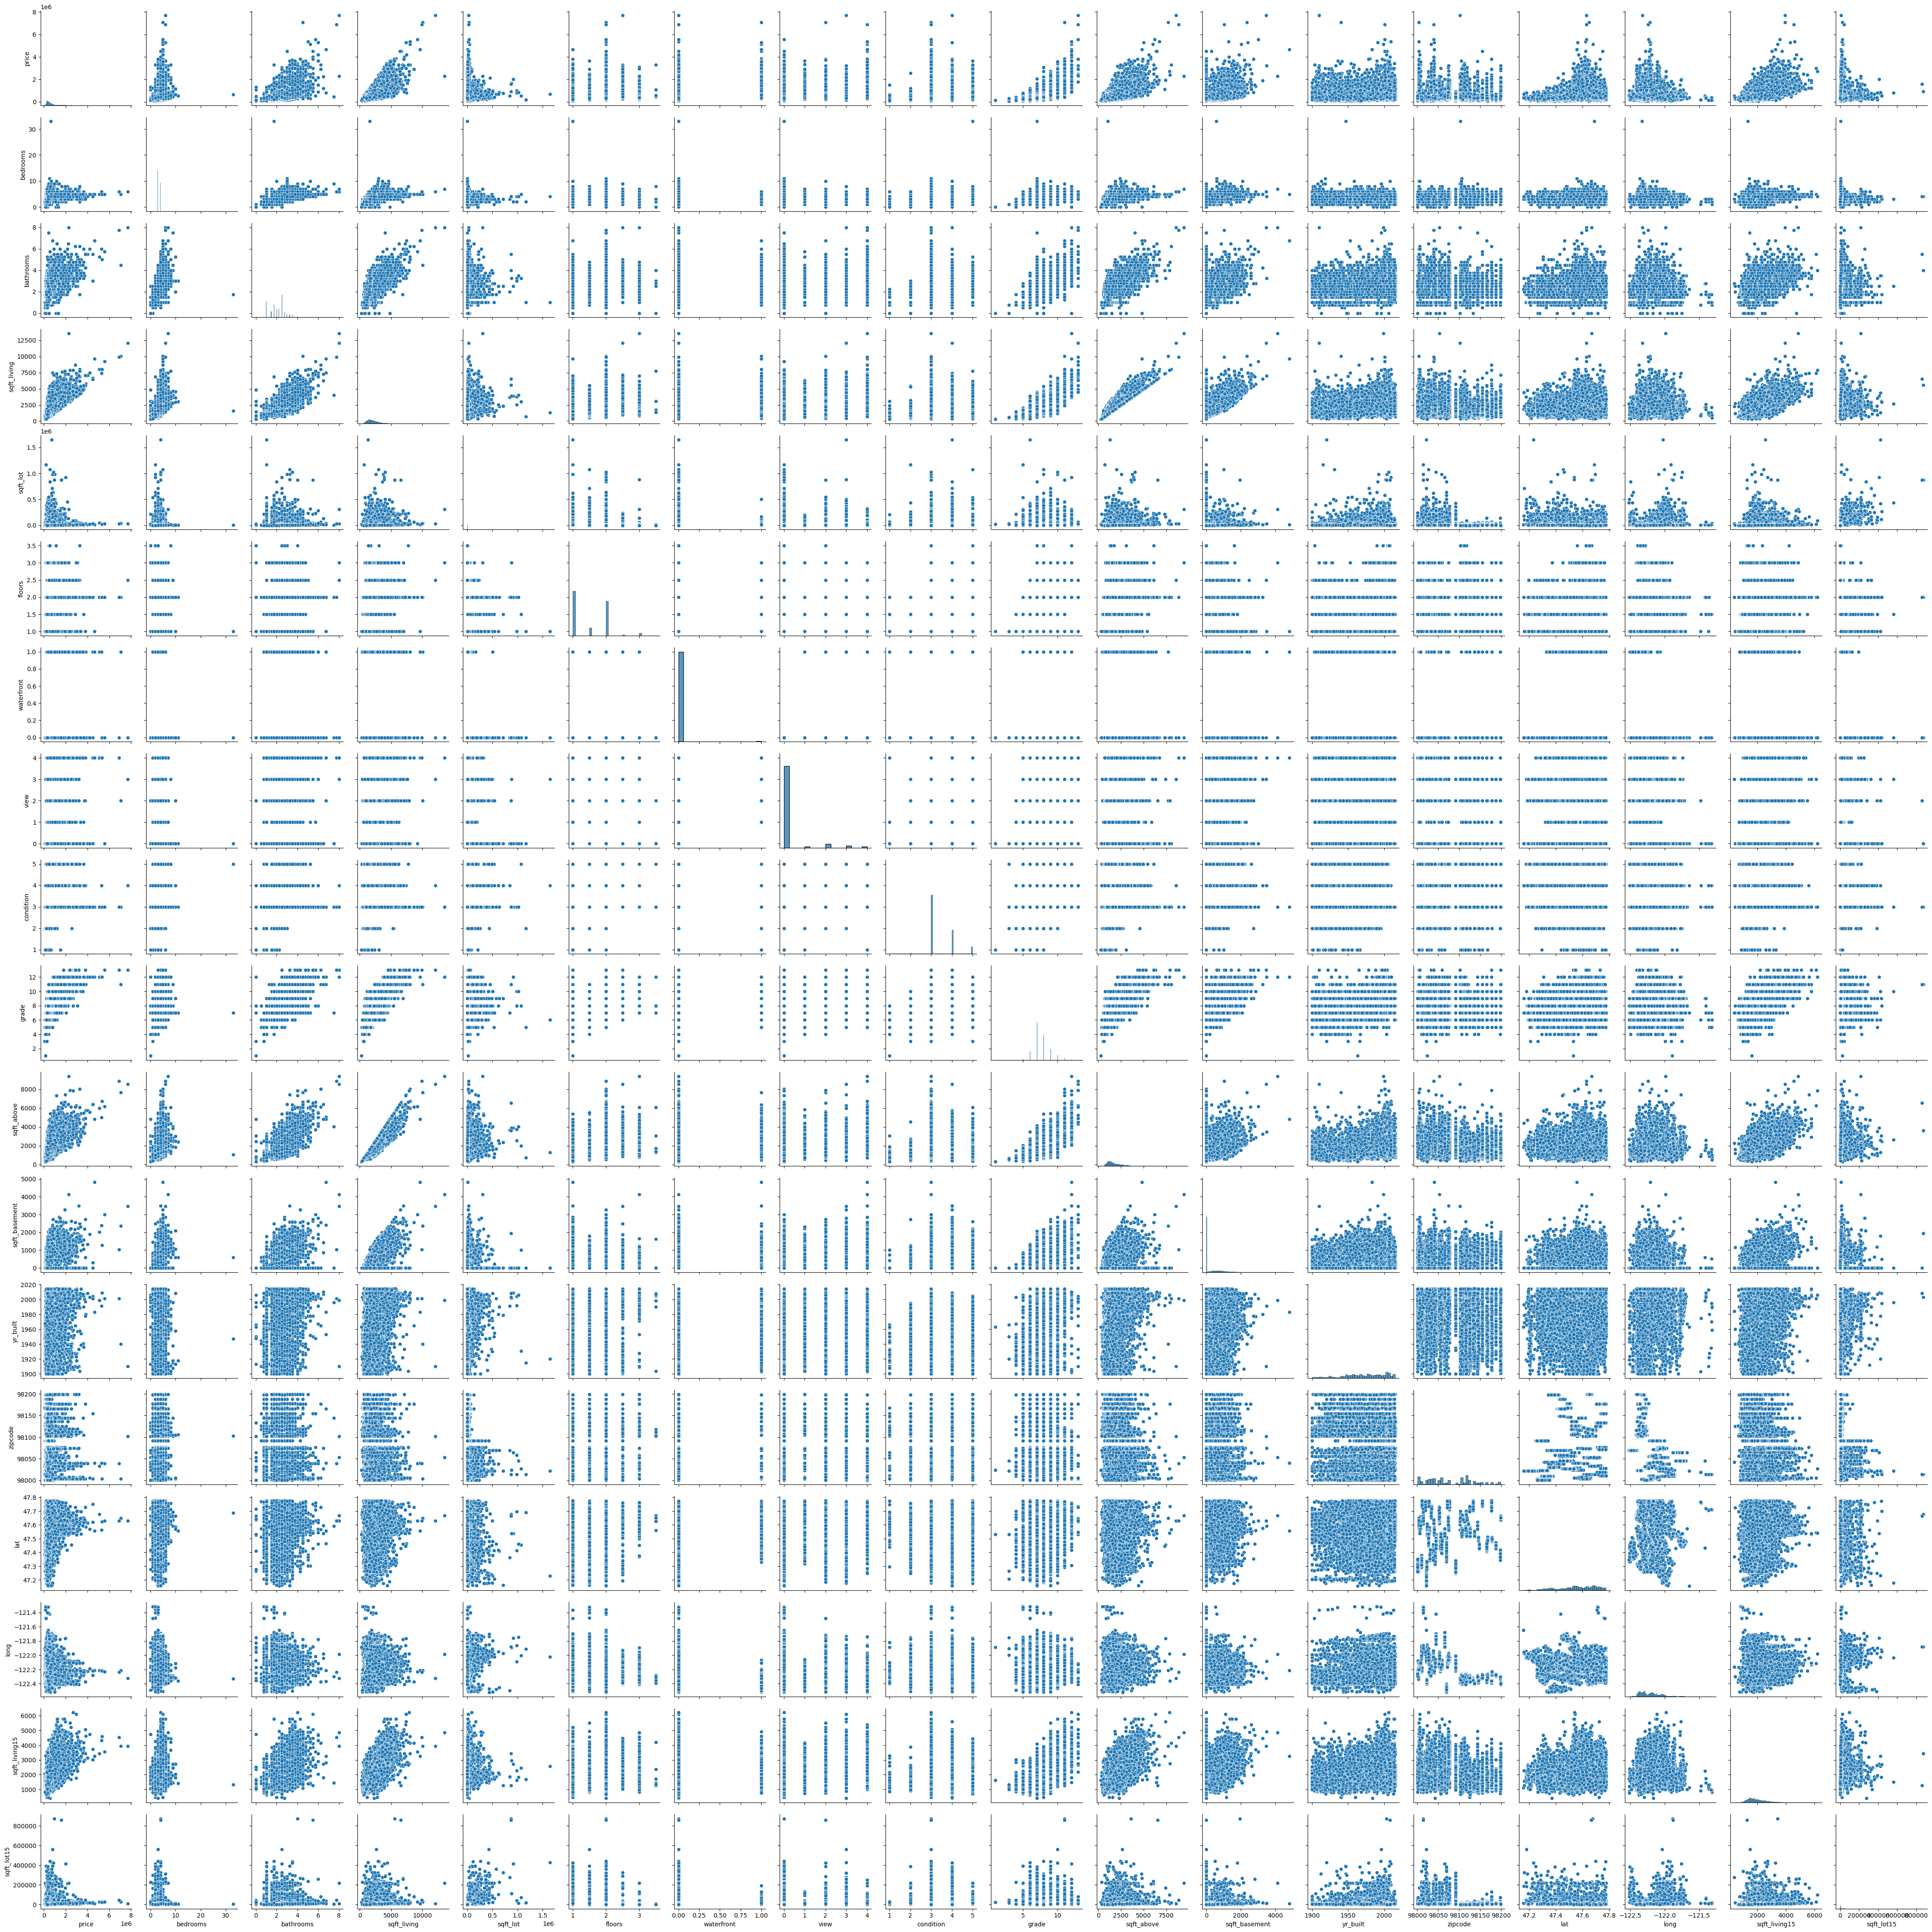

In [720]:
sns.pairplot(df)
plt.show()

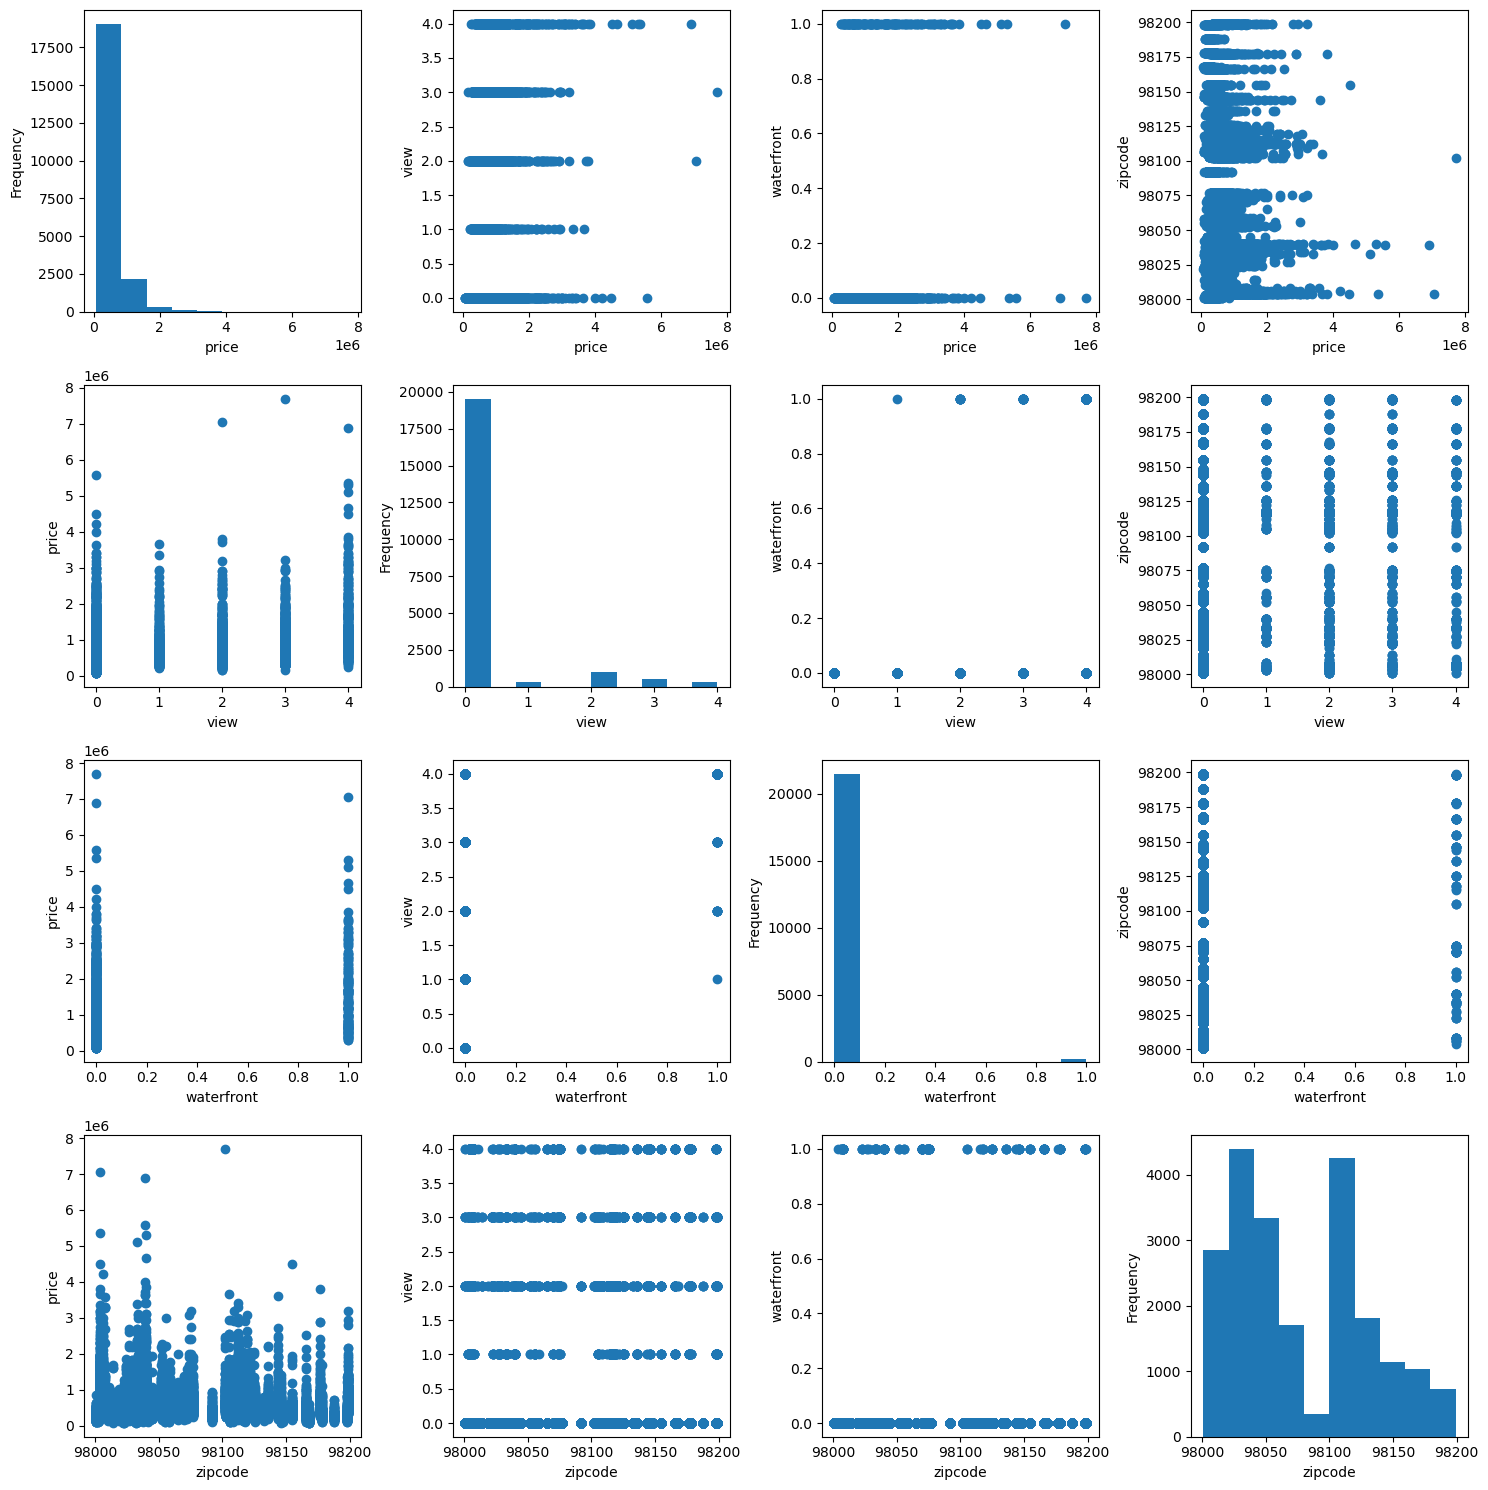

In [701]:
# Assuming 'data' is your DataFrame containing the variables you want to visualize
# Replace 'data' with the name of your DataFrame

# Define the variables you want to visualize
variables = ['price', 'view', 'waterfront', 'zipcode']

# Create a grid of subplots
fig, axes = plt.subplots(len(variables), len(variables), figsize=(15, 15))

# Plot relationships between variables
for i, var1 in enumerate(variables):
    for j, var2 in enumerate(variables):
        if i != j:
            axes[i, j].scatter(df[var1], df[var2])
            axes[i, j].set_xlabel(var1)
            axes[i, j].set_ylabel(var2)
        else:
            axes[i, j].hist(df[var1])
            axes[i, j].set_xlabel(var1)
            axes[i, j].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [702]:
# Split the dataset into X and y columns
y = df[['price']]                    # Dependent variable
X = df.drop(['price'], axis = 1)     # Independent variables

In [703]:
# Define the list of training split sizes
train_split_sizes = [0.15, 0.2, 0.25, 0.3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state = 42)

In [704]:
def split_data(test_split_size):
    print(f"Training split: {test_split_size}")
    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split_size, random_state = 42)
    # Show the rows and columns
    print(f"X shape: {X.shape}, y shape: {y.shape}, x_train shape: {X_train.shape}, y_train shape {y_train.shape}, X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

    return X_train, X_test, y_train, y_test

In [705]:
# # # Standardize the features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [721]:
def grid_search_model(model, param_grid, scoring, cv=5, verbose=1):
    # Instantiate the grid search model
    grid_search_model = GridSearchCV(estimator=model, param_grid=param_grid,
                                     cv=cv, n_jobs=-1,verbose=verbose, scoring=scoring)
    grid_search_model.fit(X_train, y_train)
    return grid_search_model

## Linear Regression 

In [710]:
# Specify hyperparameters for tuning
param_grid = {
        'fit_intercept': [True, False]
        }

# Create grid search model
lr_grid_search = grid_search_model(LinearRegression(), param_grid, scoring='r2')
# grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [711]:
# scores of GridSearch CV
scores = lr_grid_search.cv_results_
pd.DataFrame(scores).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.039277      0.006420         0.014308        0.001613   
1       0.034377      0.011695         0.009371        0.007652   

  param_fit_intercept                    params  split0_test_score  \
0                True   {'fit_intercept': True}           0.681246   
1               False  {'fit_intercept': False}           0.681250   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.684057           0.712453           0.714326           0.695366   
1           0.683959           0.712210           0.714637           0.695079   

   mean_test_score  std_test_score  rank_test_score  
0         0.697490        0.013829                1  
1         0.697427        0.013880                2

In [712]:
print(f"The best training accuracy of {lr_grid_search.best_score_:.3f} is achieved using the following parameters:\n\n {lr_grid_search.best_params_}\n")
print(f"Using the best parameters, the model can achieve an accuracy of {lr_grid_search.score(X_test, y_test):.3f} on the test data.")

The best training accuracy of 0.697 is achieved using the following parameters:

 {'fit_intercept': True}

Using the best parameters, the model can achieve an accuracy of 0.701 on the test data.


In [713]:
# Loop over each training split size
for test_split in train_split_sizes:
    X_train, X_test, y_train, y_test = split_data(test_split)
    grid_search = grid_search_model(LinearRegression(), param_grid, scoring='r2', verbose=0)
    
    # Get the best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters: \n{best_params}\n")

    # Evaluate the models training and test scores
    print(f"Train Set Score: {grid_search.best_score_:.3f}")
    print(f"Test Set Score: {grid_search.score(X_test, y_test):.3f}\n")

Training split: 0.15
X shape: (21613, 17), y shape: (21613, 1), x_train shape: (18371, 17), y_train shape (18371, 1), X_test shape: (3242, 17), y_test shape: (3242, 1)
Best Hyperparameters: 
{'fit_intercept': True}

Train Set Score: 0.700
Test Set Score: 0.688

Training split: 0.2
X shape: (21613, 17), y shape: (21613, 1), x_train shape: (17290, 17), y_train shape (17290, 1), X_test shape: (4323, 17), y_test shape: (4323, 1)
Best Hyperparameters: 
{'fit_intercept': True}

Train Set Score: 0.697
Test Set Score: 0.701

Training split: 0.25
X shape: (21613, 17), y shape: (21613, 1), x_train shape: (16209, 17), y_train shape (16209, 1), X_test shape: (5404, 17), y_test shape: (5404, 1)
Best Hyperparameters: 
{'fit_intercept': True}

Train Set Score: 0.696
Test Set Score: 0.705

Training split: 0.3
X shape: (21613, 17), y shape: (21613, 1), x_train shape: (15129, 17), y_train shape (15129, 1), X_test shape: (6484, 17), y_test shape: (6484, 1)
Best Hyperparameters: 
{'fit_intercept': True}



In [748]:
# Selecting training test split with the best score
X_train, X_test, y_train, y_test = split_data(0.25)
lr_model = LinearRegression('fit_intercept': True)
lr_model.fit(X_train, y_train)

SyntaxError: invalid syntax (949980073.py, line 3)

In [715]:
# Calculate the intercept and coefficient
intercept = grid_search.best_estimator_.intercept_
coefficients = grid_search.best_estimator_.coef_
print(f"The y-intercept value for the multiple regression is: {intercept[0]:.3f}\n")
print(f"The coefficient values for the multiple regession are: \n{coefficients}")

The y-intercept value for the multiple regression is: 7921063.198

The coefficient values for the multiple regession are: 
[[-3.46870847e+04  4.28357113e+04  1.12102279e+02  9.72803345e-02
   6.63296491e+03  5.49557291e+05  5.54474780e+04  2.07948096e+04
   9.53442776e+04  7.20951492e+01  4.00071294e+01 -2.73379370e+03
  -5.62368802e+02  5.92851901e+05 -1.94444271e+05  1.52345651e+01
  -3.23353483e-01]]


In [716]:
# Making predictions on the testing set
y_pred = grid_search.predict(X_test)
# Find the y-intercept of the regression line
y_intercept = y_pred[0]
print(y_intercept)
print(y_pred)

[457778.65841676]
[[ 457778.65841676]
 [ 746386.05131446]
 [1244754.07799988]
 ...
 [ 446393.79009122]
 [1341773.27560581]
 [ 437716.87935132]]


In [717]:
# Calculate the error values
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.3f}")
print(f"R^2 test: {metrics.r2_score(y_test, y_pred):.3f}")

Mean Absolute Error: 126863.168
Root Mean Squared Error: 210130.343
R^2 test: 0.705


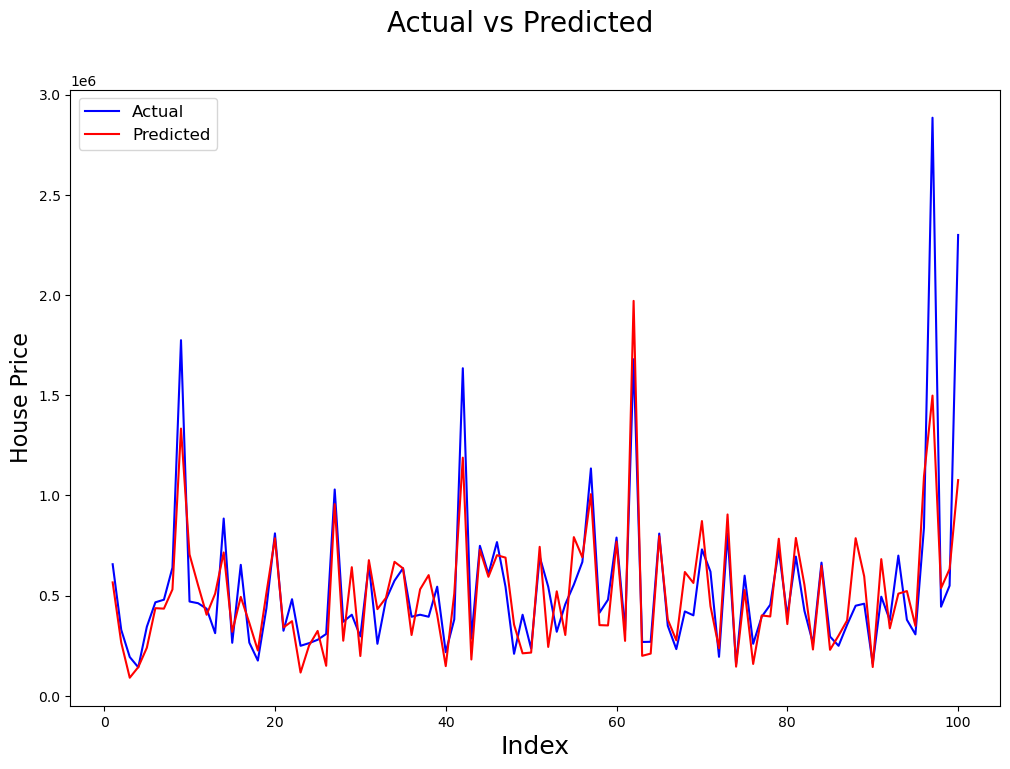

In [718]:
# Sample a subset of the data for plotting
sample_size = 100
# Selecting 100 random sample indices
indices = np.random.choice(len(y_test), size=sample_size, replace=False)
y_test_sample = y_test.iloc[indices]
y_pred_sample = y_pred[indices]
# Generating index
index = [i for i in range(1, sample_size+1, 1)]     

fig = plt.figure(figsize=(12,8))
plt.plot(index, y_test_sample, color="blue", linewidth=1.5, linestyle="-", label="Actual")
plt.plot(index, y_pred_sample, color="red", linewidth=1.5, linestyle="-", label="Predicted")
# Heading
fig.suptitle('Linear Regression Actual vs Predicted', fontsize=20)
# X-label
plt.xlabel('Index', fontsize = 18)
# Y-label
plt.ylabel('House Price', fontsize = 16)
# Legend
plt.legend(fontsize = 12)                            
plt.show()

Text(0, 0.5, 'y_test - y_pred')

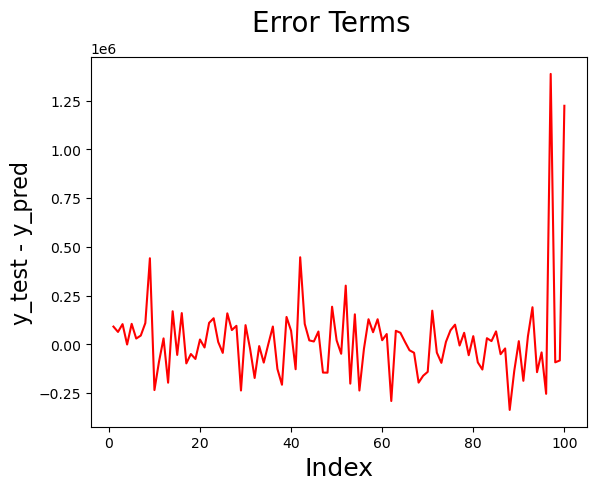

In [719]:
# Error terms
fig = plt.figure()
plt.plot(index,y_test_sample-y_pred_sample, color="red", linewidth=1.5, linestyle="-")
# Plot heading 
fig.suptitle('Error Terms', fontsize=20)
# X-label
plt.xlabel('Index', fontsize=18)
# Y-label
plt.ylabel('y_test - y_pred', fontsize=16)            

## kNN Regression

In [723]:
# Specify hyperparameters for tuning
kNN_param_grid = {
    'n_neighbors': range(2, 21, 2),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}
# Create grid search model
kNN_grid_search = grid_search_model(KNeighborsRegressor(), kNN_param_grid, scoring='r2')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


In [724]:
# Scores of GridSearch CV
scores = kNN_grid_search.cv_results_
pd.DataFrame(scores).head(10)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.015526  5.644641e-03         1.977332        0.005376   
1       0.017910  4.908782e-03         1.980975        0.011158   
2       0.007016  8.626577e-03         0.678762        0.097202   
3       0.009375  7.654968e-03         0.597025        0.015443   
4       0.015623  5.309834e-07         1.805213        0.028987   
5       0.009378  7.656719e-03         1.777219        0.018904   
6       0.012480  6.240366e-03         0.597805        0.006094   
7       0.012501  6.250286e-03         0.594319        0.000134   
8       0.012502  6.251145e-03         1.793392        0.028968   
9       0.009376  7.655707e-03         1.865057        0.045717   

  param_n_neighbors param_p param_weights  \
0                 2       1       uniform   
1                 2       1      distance   
2                 2       2       uniform   
3                 2       2      distance   
4                 4       1       uniform   
5                 4       1      distance   
6                 4       2       uniform   
7                 4       2      distance   
8                 6       1       uniform   
9                 6       1      distance   

                                              params  split0_test_score  \
0   {'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}           0.411645   
1  {'n_neighbors': 2, 'p': 1, 'weights': 'distance'}           0.411244   
2   {'n_neighbors': 2, 'p': 2, 'weights': 'uniform'}           0.333915   
3  {'n_neighbors': 2, 'p': 2, 'weights': 'distance'}           0.333267   
4   {'n_neighbors': 4, 'p': 1, 'weights': 'uniform'}           0.463054   
5  {'n_neighbors': 4, 'p': 1, 'weights': 'distance'}           0.465937   
6   {'n_neighbors': 4, 'p': 2, 'weights': 'uniform'}           0.418778   
7  {'n_neighbors': 4, 'p': 2, 'weights': 'distance'}           0.421389   
8   {'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}           0.473389   
9  {'n_neighbors': 6, 'p': 1, 'weights': 'distance'}           0.478597   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.473187           0.474197           0.457039           0.470915   
1           0.478213           0.472339           0.452088           0.474191   
2           0.462284           0.424464           0.418718           0.433792   
3           0.466877           0.421817           0.414583           0.438487   
4           0.492691           0.542543           0.514500           0.538601   
5           0.508437           0.548039           0.517562           0.543456   
6           0.469588           0.506130           0.490008           0.505535   
7           0.483138           0.510913           0.492385           0.512071   
8           0.485045           0.559435           0.532620           0.555611   
9           0.502487           0.566077           0.536553           0.563174   

   mean_test_score  std_test_score  rank_test_score  
0         0.457397        0.023697               38  
1         0.457615        0.024886               37  
2         0.414635        0.043050               40  
3         0.415006        0.044654               39  
4         0.510278        0.029666               18  
5         0.516686        0.029475               15  
6         0.478008        0.032471               36  
7         0.483979        0.033177               34  
8         0.521220        0.035692               13  
9         0.529378        0.034183                6

In [725]:
print(f"The best training accuracy of {kNN_grid_search.best_score_:.3f} is achieved using the following parameters:\n\n {kNN_grid_search.best_params_}")
print(f"\nUsing the best parameters, the model can achieve an accuracy of {kNN_grid_search.score(X_test, y_test):.3f} on the test data.")

The best training accuracy of 0.536 is achieved using the following parameters:

 {'n_neighbors': 12, 'p': 1, 'weights': 'distance'}

Using the best parameters, the model can achieve an accuracy of 0.545 on the test data.


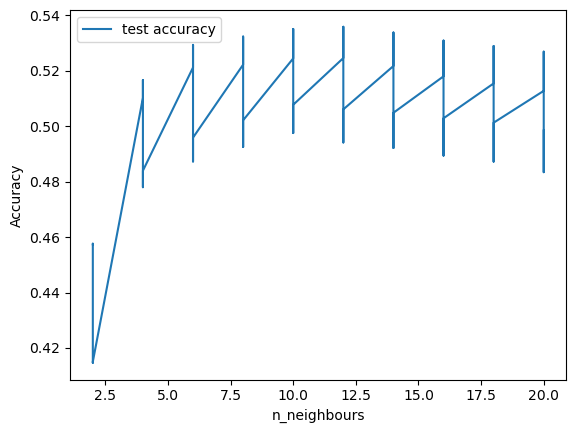

In [735]:
# Plotting accuracies for n_neighbours
plt.figure()
plt.plot(scores["param_n_neighbors"],
         scores["mean_test_score"],
         label="test accuracy")
plt.xlabel("n_neighbours")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [738]:
# Loop over each training split size
for test_split in train_split_sizes:
    X_train, X_test, y_train, y_test = split_data(test_split)
    grid_search = grid_search_model(KNeighborsRegressor(), kNN_param_grid, scoring='r2', verbose=0)
    
    # Get the best hyperparameters
    best_params = grid_search.best_params_
    print(f"Best Hyperparameters: \n{best_params}\n")

    # Evaluate the models training and test scores
    print(f"Train Set Score: {grid_search.best_score_:.3f}")
    print(f"Test Set Score: {grid_search.score(X_test, y_test):.3f}\n")

Training split: 0.15
X shape: (21613, 17), y shape: (21613, 1), x_train shape: (18371, 17), y_train shape (18371, 1), X_test shape: (3242, 17), y_test shape: (3242, 1)
Best Hyperparameters: 
{'n_neighbors': 8, 'p': 1, 'weights': 'distance'}

Train Set Score: 0.537
Test Set Score: 0.567

Training split: 0.2
X shape: (21613, 17), y shape: (21613, 1), x_train shape: (17290, 17), y_train shape (17290, 1), X_test shape: (4323, 17), y_test shape: (4323, 1)
Best Hyperparameters: 
{'n_neighbors': 12, 'p': 1, 'weights': 'distance'}

Train Set Score: 0.539
Test Set Score: 0.550

Training split: 0.25
X shape: (21613, 17), y shape: (21613, 1), x_train shape: (16209, 17), y_train shape (16209, 1), X_test shape: (5404, 17), y_test shape: (5404, 1)
Best Hyperparameters: 
{'n_neighbors': 12, 'p': 1, 'weights': 'distance'}

Train Set Score: 0.536
Test Set Score: 0.545

Training split: 0.3
X shape: (21613, 17), y shape: (21613, 1), x_train shape: (15129, 17), y_train shape (15129, 1), X_test shape: (648

In [751]:
# Selecting training test split and parameters with the best score
X_train, X_test, y_train, y_test = split_data(0.15)
kNN_model = KNeighborsRegressor(n_neighbors=8, p=1, weights='distance')
kNN_model.fit(X_train, y_train)

Training split: 0.15
X shape: (21613, 17), y shape: (21613, 1), x_train shape: (18371, 17), y_train shape (18371, 1), X_test shape: (3242, 17), y_test shape: (3242, 1)


KNeighborsRegressor(n_neighbors=8, p=1, weights='distance')

In [752]:
# Making predictions on the testing set
y_pred = kNN_model.predict(X_test)
# Find the y-intercept of the regression line
y_intercept = y_pred[0]
print(y_intercept)
print(y_pred)

[396539.69186066]
[[396539.69186066]
 [865235.28795801]
 [994109.7828324 ]
 ...
 [364739.61945015]
 [391968.31357687]
 [425513.28570216]]


In [753]:
# Calculate the error values
print(f"Mean Absolute Error: {metrics.mean_absolute_error(y_test, y_pred):.3f}")
print(f"Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.3f}")
print(f"R^2 test: {metrics.r2_score(y_test, y_pred):.3f}")

Mean Absolute Error: 153303.001
Root Mean Squared Error: 257091.300
R^2 test: 0.567


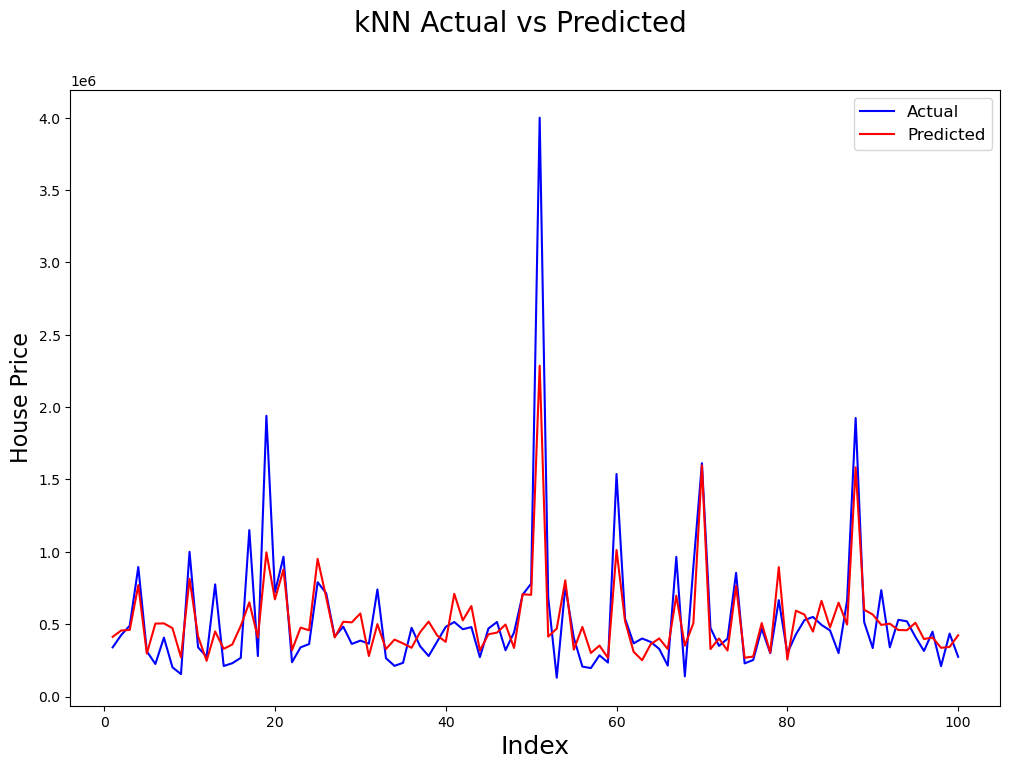

In [754]:
# Sample a subset of the data for plotting
sample_size = 100
# Selecting 100 random sample indices
indices = np.random.choice(len(y_test), size=sample_size, replace=False)
y_test_sample = y_test.iloc[indices]
y_pred_sample = y_pred[indices]
# Generating index
index = [i for i in range(1, sample_size+1, 1)]     

fig = plt.figure(figsize=(12,8))
plt.plot(index, y_test_sample, color="blue", linewidth=1.5, linestyle="-", label="Actual")
plt.plot(index, y_pred_sample, color="red", linewidth=1.5, linestyle="-", label="Predicted")
# Heading
fig.suptitle('kNN Actual vs Predicted', fontsize=20)
# X-label
plt.xlabel('Index', fontsize = 18)
# Y-label
plt.ylabel('House Price', fontsize = 16)
# Legend
plt.legend(fontsize = 12)                            
plt.show()

Text(0, 0.5, 'y_test - y_pred')

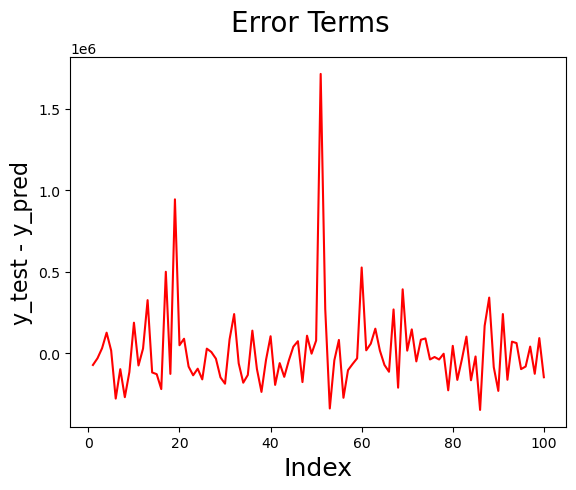

In [757]:
# Error terms
fig = plt.figure()
plt.plot(index,y_test_sample-y_pred_sample, color="red", linewidth=1.5, linestyle="-")
# Plot heading 
fig.suptitle('Error Terms', fontsize=20)
# X-label
plt.xlabel('Index', fontsize=18)
# Y-label
plt.ylabel('y_test - y_pred', fontsize=16)  